<a href="https://colab.research.google.com/github/2pterons/training/blob/main/MachineLearning/2_3_%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9C%BC%EB%A1%9C_%EC%95%84%EB%8B%AC%EB%A6%B0_%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
class AdalineGD(object):
  """적응형 선형 뉴런 분류기

  매개변수
  --------------
  eta : float
    학습률 (0.0과 1.0사이)
  n_iter : int
    훈련 데이터셋 반복 횟수
  random_state : int
    가중치 무작위 초기화를 위한 난수 생성기 시드

  속성
  --------------
  w_ : 1d-array
    학습된 가중치
  cost_ : list
    에포크마다 누적된 비용 함수의 제곱합

  """
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    """훈련 데이터 학습

    매개변수
    --------------
    X : {array-like}, shape = [n_samples, n_features]
      n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
    y : array-like, shape = [n_samples]
      타깃 값
    
    반환값
    --------------
    self : object
    """
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01,
                          size=1 + X.shape[1])
    self.cost_ = []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors**2).sum() / 2.0
      self.cost_.append(cost)
    return self

  def net_input(self, X):
    """최종 입력 계산"""
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
    """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다."""
    return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)



NameError: ignored

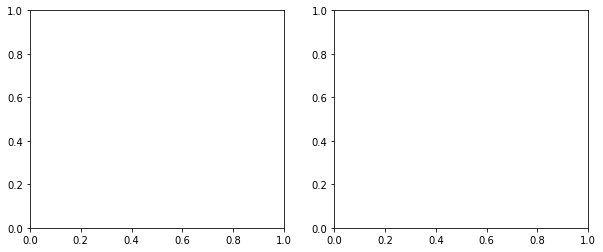

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_)+1),
                 np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X,y)
ax[1].plot(range(1, len(ada2.cost_) + 1),
           ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Lerning rate 0.0001')
plt.show()